# Exam project
> Exam project for "Introduction to Programming and Numerical Analysis" 
> - Group: "a-j"

**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [6]:
import numpy as np
import pandas as pd
from types import SimpleNamespace
import exam
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Calling classes
problem1 = exam.Problem1()
problem2 = exam.Problem2()
problem3 = exam.Problem3()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [7]:
# w as numeraire
w = 1

# the price range
p1_range = (0.1, 2.0, 10)
p2_range = (0.1, 2.0, 10)

# check market clearing condition by calling the class
df_results, df_clearing = problem1.market_clearing(w, p1_range, p2_range)

# Display first 10 rows and last 10 rows of results
print("First 10 Results:")
display(df_results.head(10))

print("Last 10 Results:")
display(df_results.tail(10))

# Display market clearing conditions
print("Values of p1 and p2 that clear their respective markets:")
display(df_clearing)

First 10 Results:


,p1,p2,Check market clearing p1,Check market clearing p2
0,0.1,0.10,False,False
1,0.1,0.31,False,False
2,0.1,0.52,False,False
3,0.1,0.73,False,False
4,0.1,0.94,False,False
5,0.1,1.16,False,False
6,0.1,1.37,False,False
7,0.1,1.58,False,False
8,0.1,1.79,False,False
9,0.1,2.00,False,False


Last 10 Results:


,p1,p2,Check market clearing p1,Check market clearing p2
90,2.0,0.10,False,False
91,2.0,0.31,False,False
92,2.0,0.52,False,False
93,2.0,0.73,False,False
94,2.0,0.94,False,False
95,2.0,1.16,False,False
96,2.0,1.37,False,False
97,2.0,1.58,False,False
98,2.0,1.79,False,False
99,2.0,2.00,False,False


Values of p1 and p2 that clear their respective markets:


,Price p1,Price p2,Check market clearing p1,Check market clearing p2
0,0.52,0.31,False,True
1,0.52,1.58,True,False


There are no combinations of $p_1$ and $p_2$ in the given linspaces that result in both good markets clearing. But there are combinations of $p_1$ and $p_2$ that results in only good market 1 clearing, and only good market 2 clearing. These combinations are as follows:

Only good market 1 clearing for $p_1 = 0.52$ and $p_2 = 0.31$

Only good market 2 clearing for $p_1 = 0.52$ and $p_2 = 1.58$

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [8]:
problem1.reset_parameters()

# Calling method for finding equilibrium
equilibrium_prices = problem1.find_equilibrium_prices()

Equilibrium prices found: 
 p1 = 1.88, p2 = 2.86
Check if good markets have cleared: 
 c1 - y1 = -0.00001, c2 - y2 = 0.00002


The equlibrium prices are thereby given as:

$p_1^* = 1.88$ and $p_2^* = 2.86$

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [9]:
problem1.reset_parameters()

# Maximizing SWF
optimal_tau, optimal_T = problem1.maximize_swf()


Optimal tau: 3.27, Optimal T: 2.31


The values of $\tau$ and T that maximize the $SWF$ are thereby given as:

$\tau^* = 3.27$ and $T^* = 2.31$

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [10]:
# Finding expected and average realized utlity
problem2.calculate_expected_utility()

,Career Track,Expected Utility,Average Realized Utility
0,1,0.995074,1.013510
1,2,1.995074,1.986184
2,3,2.995074,2.985530


- *Since the the error term of the expected utility has a mean of zero, when K is sufficiently large, we see that the expected utility is close to the value of v_j*

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

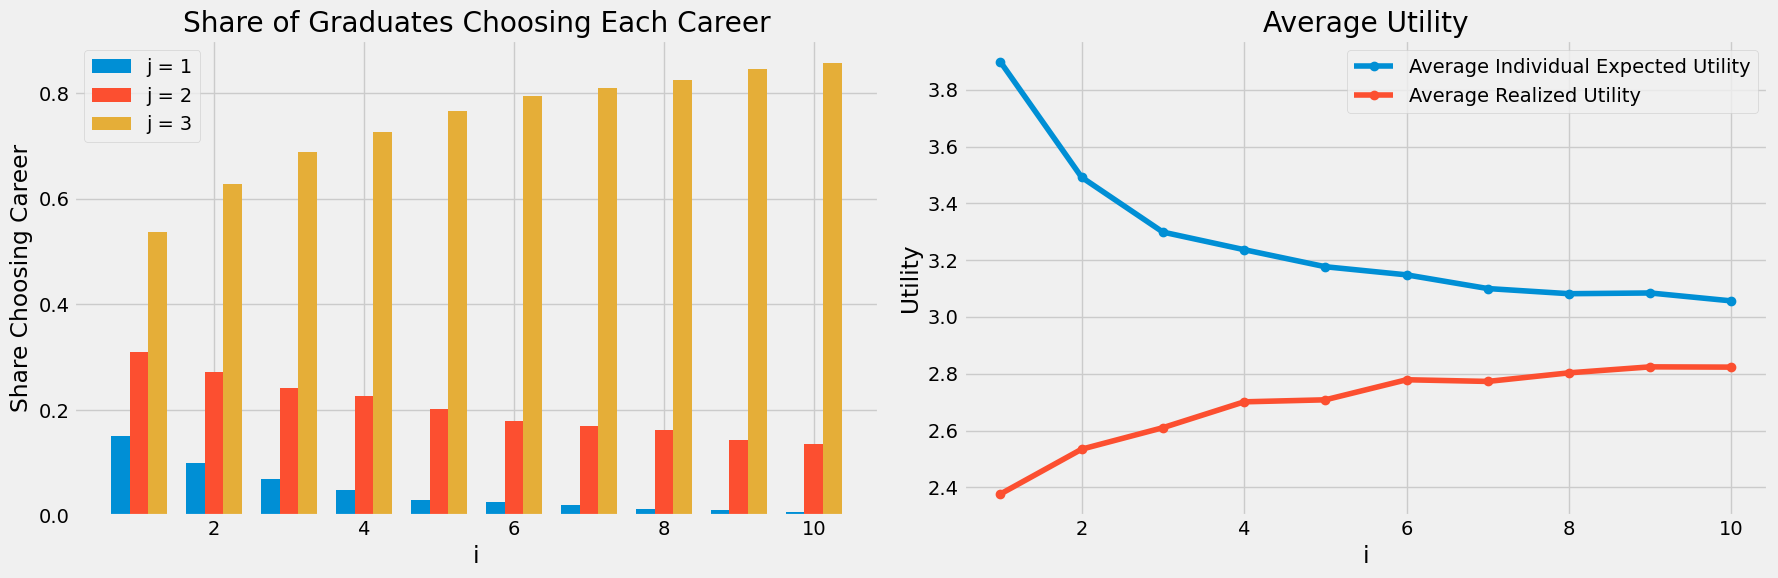

In [12]:
# Simulating and plotting the process
problem2.simulate_process()
problem2.plot_results()

- *As the number of friends per career increases (i = 1 to i = 10), Career 3 (j = 3) becomes increasingly dominant in graduates' choices*
- *As the number of friends per career increases (i = 1 to i = 10), the expected utility decreases while the realized utility increases.*

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

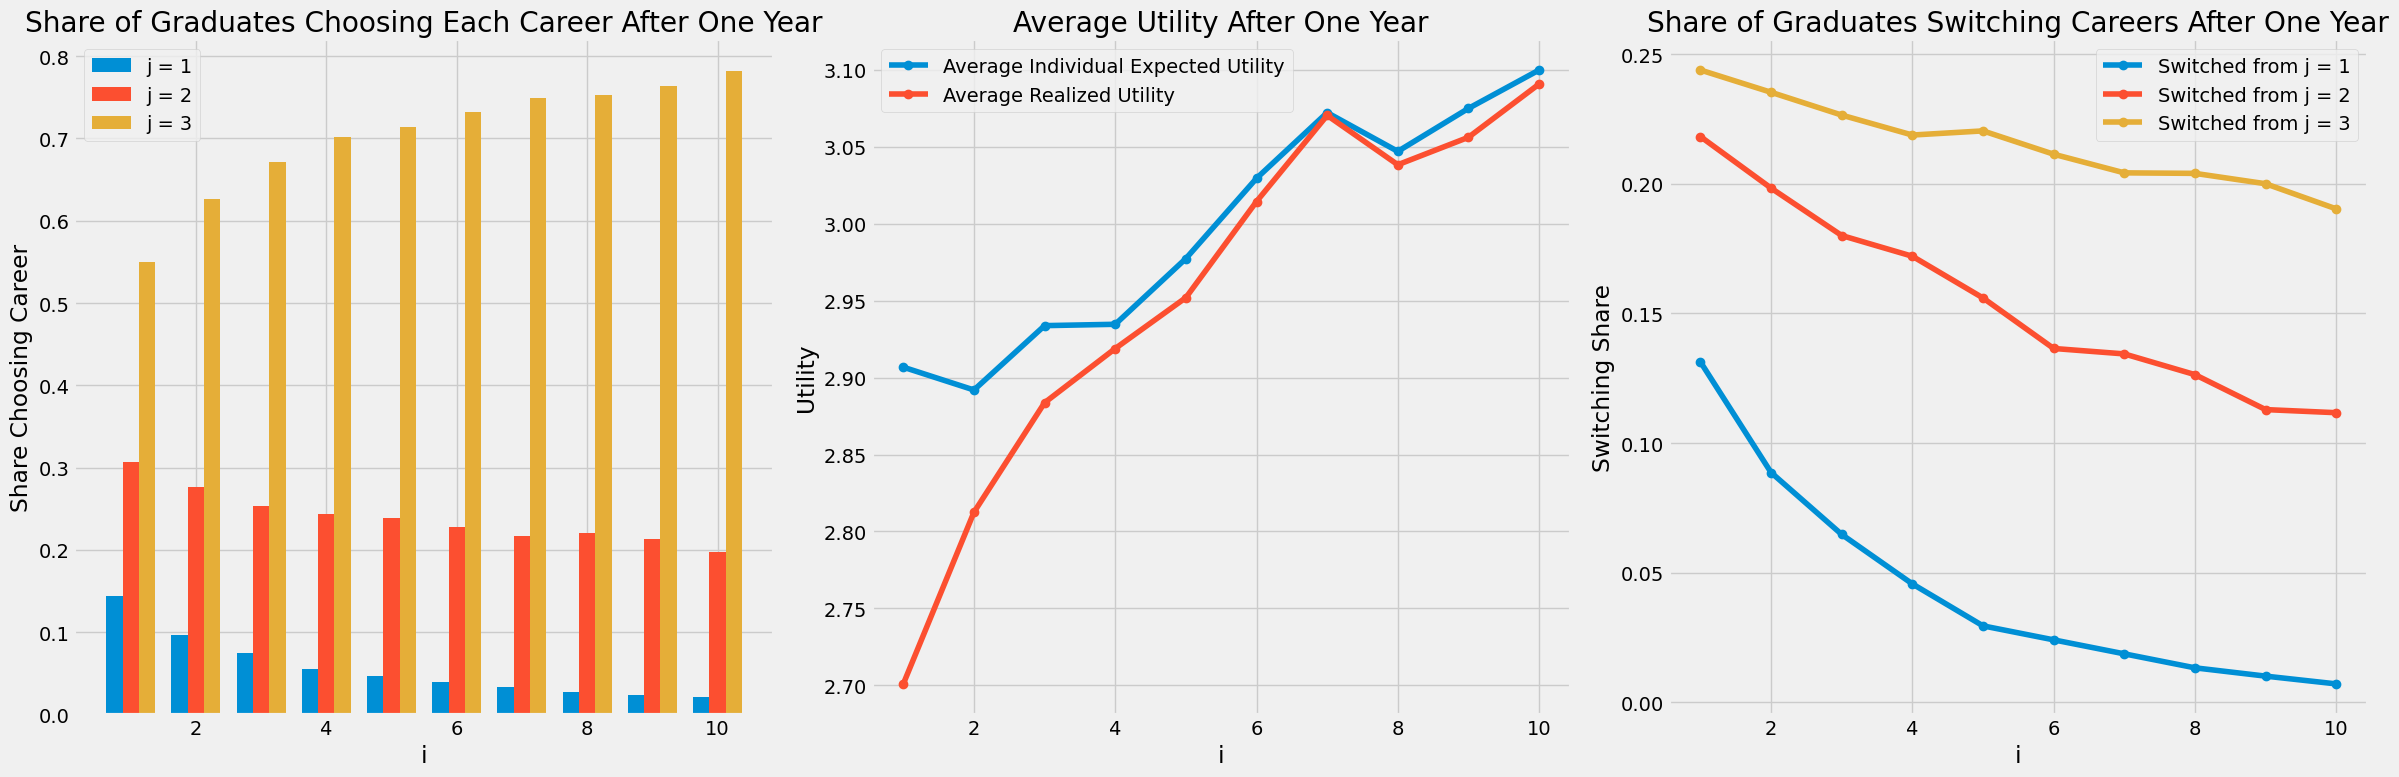

In [13]:
# Simulate the new optimal career choice after one year
problem2.simulate_new_optimal_career_choice()

# Plot results of the new simulation
problem2.plot_new_results()

- *After one year, Career 3 (j = 3) remains the most chosen career, especially as the number of friends per career increases.*
- *Both expected and realized utilities increase as the number of friends per career increases after one year.*
- *The share of graduates switching from Career 1 (j = 1) decreases significantly as the number of friends per career increases, while switching from Career 3 (j = 3) remains relatively stable.*

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

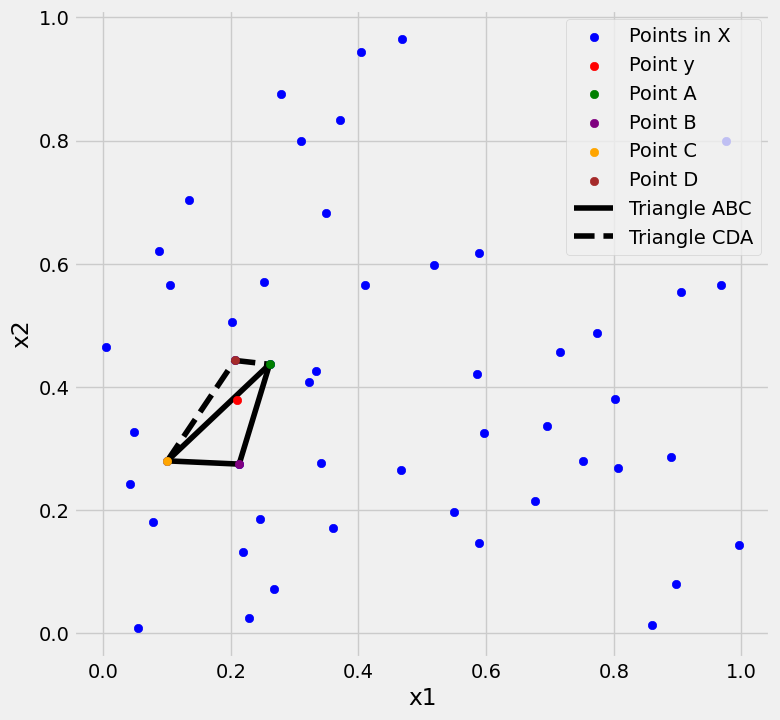

Point A: [0.26071605 0.43635845]
Point B: [0.21315735 0.274245  ]
Point C: [0.10056103 0.27951775]
Point D: [0.20634391 0.44272557]
Point y: [0.20901926 0.37774759]


In [14]:
# Call method to calculate points
problem3.find_points()

# Call method to plot points and triangles in a combined plot
problem3.plot_points_and_triangles()

# Print the points for verification
print(f"Point A: {problem3.A}")
print(f"Point B: {problem3.B}")
print(f"Point C: {problem3.C}")
print(f"Point D: {problem3.D}")
print(f"Point y: {problem3.y}")


The points $A,B,C$ and $D$ are thereby given as:

$A$: $(0.26071605, 0.43635845)$

$B$: $(0.21315735, 0.274245)$

$C$: $(0.10056103, 0.27951775)$

$D$: $(0.20634391, 0.44272557)$

And point $y$ is given as:

$y$: $(0.20901926, 0.37774759)$

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

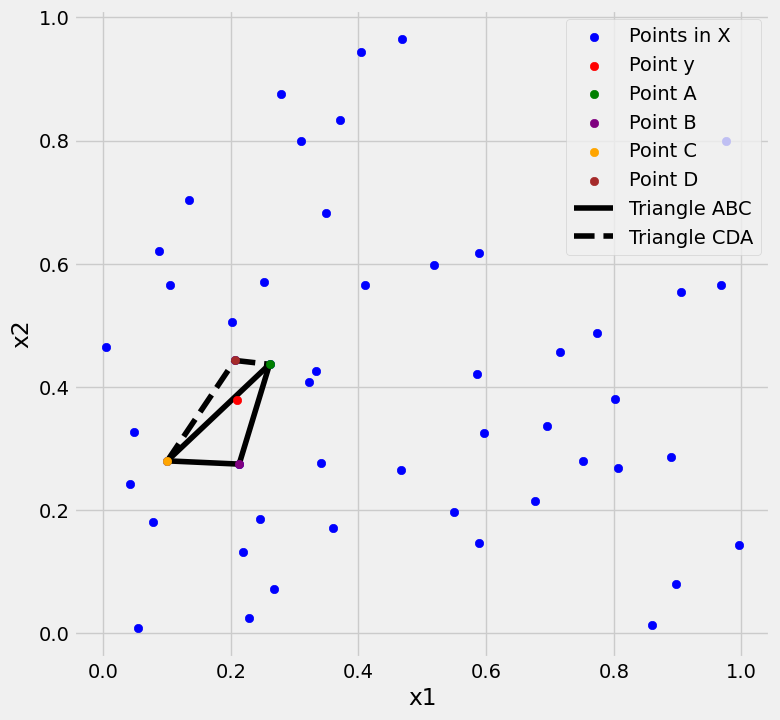

Barycentric coordinates for triangle ABC: (0.6286263152916166, 0.06910145494351515, 0.3022722297648682)
Barycentric coordinates for triangle CDA: (0.3682598757102867, -0.13392661883334067, 0.765666743123054)
Point y is in triangle: ABC


In [15]:
# Call method to calculate the barycentric coordinates of point y, can compute which triangle y lies within
result = problem3.solve()

# Print the result
print(f"Barycentric coordinates for triangle ABC: {result['rABC']}")
print(f"Barycentric coordinates for triangle CDA: {result['rCDA']}")
print(f"Point y is in triangle: {result['containing_triangle']}")

The barycentric coordinates for $\triangle ABC$:

$(0.6286263152916166, 0.06910145494351515, 0.3022722297648682)$

The barycentric coordinates for $\triangle CDA$:

$(0.3682598757102867, -0.13392661883334067, 0.765666743123054)$

And point $y$ is calculated to be in $\triangle ABC$, which can be confirmed visually by looking at the above plot.

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [16]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in problem3.X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

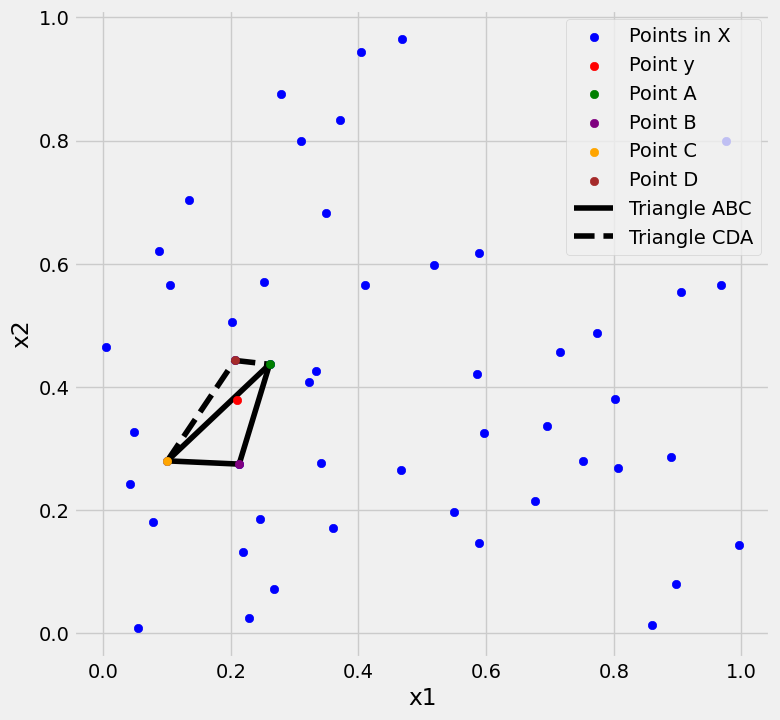

Approximation of f(y): 0.08405201731052576
True value of f(y): 0.0789565216259594
Absolute error: 0.005095495684566367


In [17]:
# Calling method to calculate the approximate and true values of f(y)
f_approx, f_true = problem3.compute_approximation(f)

# Print the results
print(f"Approximation of f(y): {f_approx}")
print(f"True value of f(y): {f_true}")
print(f"Absolute error: {abs(f_approx - f_true)}")

The approximation of $f(y)$ is:

$f(y)_{\textrm{approx}} = 0.08405201731052576$

While the true value is:

$f(y)_{\textrm{true}} = 0.0789565216259594$

Which constitues an absolute error of:

$f(y)_{\textrm{approx}} - f(y)_{\textrm{true}} = 0.005095495684566367$

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [18]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

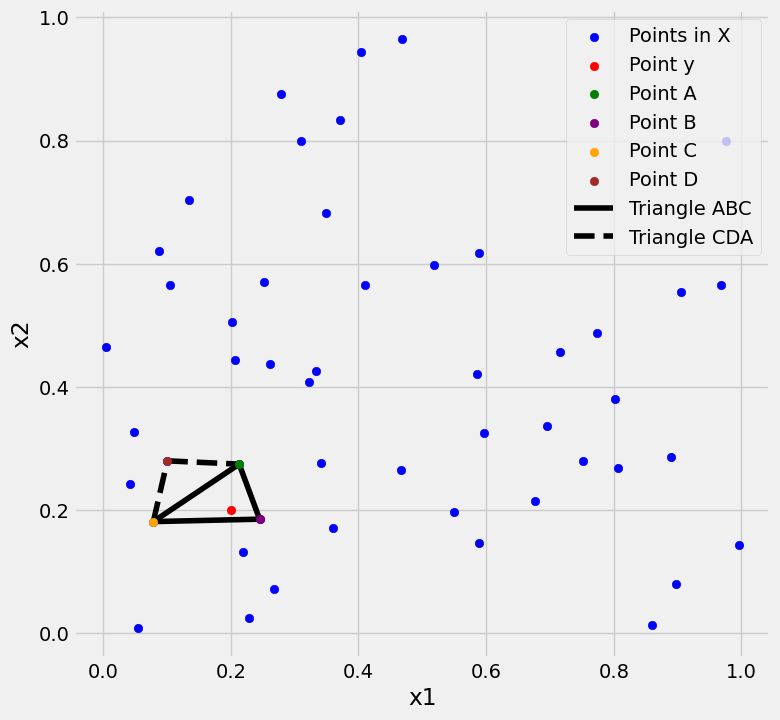

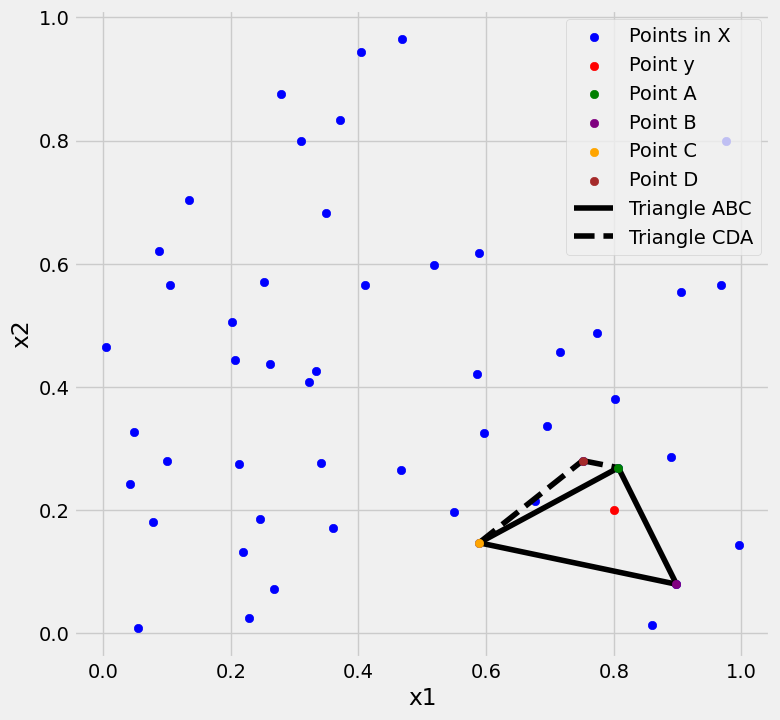

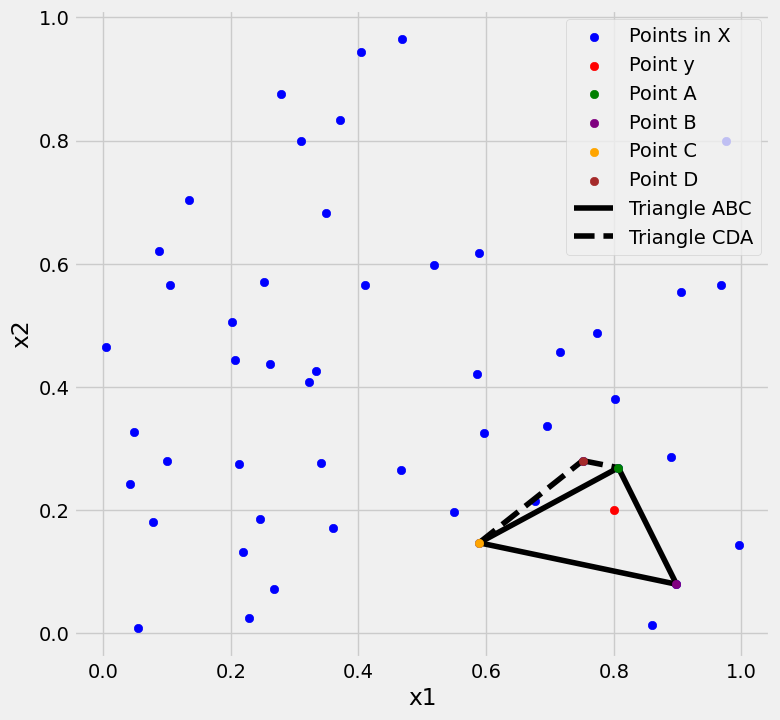

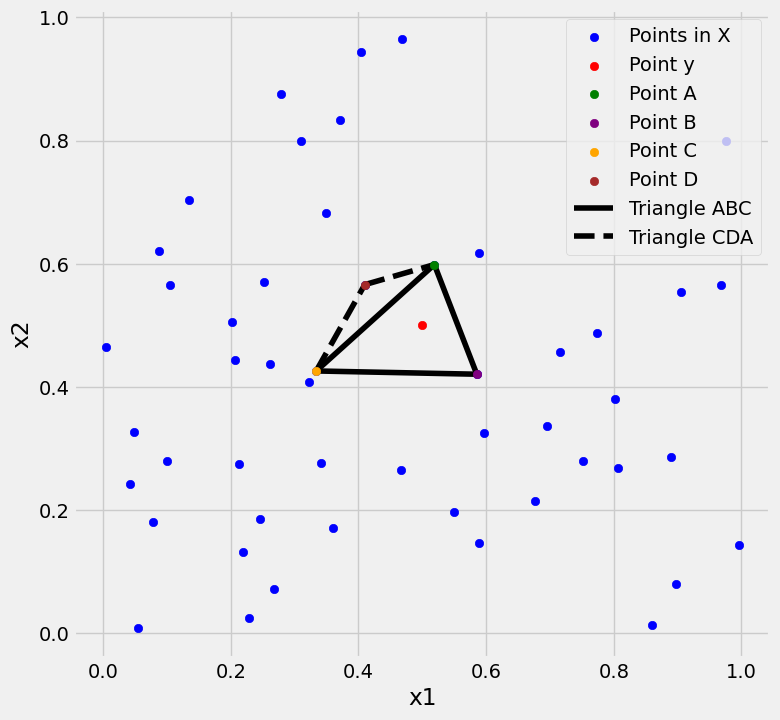

Point: (0.2, 0.2)
Approximation of f(y): 0.04032631372248057
True value of f(y): 0.04000000000000001
Absolute error: 0.0003263137224805632

Point: (0.8, 0.2)
Approximation of f(y): 0.15874233999349835
True value of f(y): 0.16000000000000003
Absolute error: 0.0012576600065016819

Point: (0.8, 0.8)
Not enough points to form triangles for this point.

Point: (0.8, 0.2)
Approximation of f(y): 0.15874233999349835
True value of f(y): 0.16000000000000003
Absolute error: 0.0012576600065016819

Point: (0.5, 0.5)
Approximation of f(y): 0.2512901561119622
True value of f(y): 0.25
Absolute error: 0.001290156111962204



In [19]:
# Compute the approximations for all points in Y
results = problem3.compute_approximations_for_set(Y, f)

for point, f_approx, f_true in results:
    print(f"Point: {point}")
    if f_approx is not None and f_true is not None:
        print(f"Approximation of f(y): {f_approx}")
        print(f"True value of f(y): {f_true}")
        print(f"Absolute error: {abs(f_approx - f_true)}")
    else:
        print("Not enough points to form triangles for this point.")
    print()

From this we can see that all points in $Y$ has enough points to form triangles, except for the point $(0.8, 0.8)$.